In [1]:
import pyclesperanto_prototype as cle
import numpy as np
from skimage.io import imshow
import matplotlib
from numpy.random import random

c:\users\rober\miniconda3\lib\site-packages\pyopencl\__init__.py:252: CompilerWarning: Non-empty compiler output encountered. Set the environment variable PYOPENCL_COMPILER_OUTPUT=1 to see more.
  warn("Non-empty compiler output encountered. Set the "
c:\users\rober\miniconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


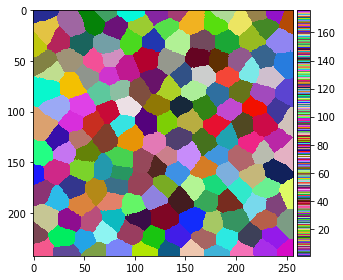

In [2]:
# Generate artificial cells as test data
tissue = cle.artificial_tissue_2d()
touch_matrix = cle.generate_touch_matrix(tissue)

cmap = matplotlib.colors.ListedColormap ( np.random.rand ( 256,3))
imshow(cle.pull_zyx(tissue), cmap=cmap)

# Associate artificial measurements to the cells

c:\users\rober\miniconda3\lib\site-packages\pyopencl\__init__.py:252: CompilerWarning: Non-empty compiler output encountered. Set the environment variable PYOPENCL_COMPILER_OUTPUT=1 to see more.
  warn("Non-empty compiler output encountered. Set the "


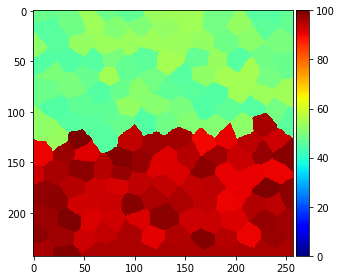

In [3]:
centroids = cle.label_centroids_to_pointlist(tissue)

coordinates = cle.pull_zyx(centroids)
values = random([coordinates.shape[1]])

for i, y in enumerate(coordinates[1]):
    if (y < 128):
        values[i] = values[i] * 10 + 45
    else:
        values[i] = values[i] * 10 + 90

measurements = cle.push_zyx(np.asarray([values]))

# visualize measurments in space
parametric_image = cle.replace_intensities(tissue, measurements)
imshow(cle.pull_zyx(parametric_image), vmin=0, vmax=100, cmap='jet')

# Local averaging smoothes edges
By averaging measurments locally, we can reduce the noise, but we also introduce a stripe where the region touch

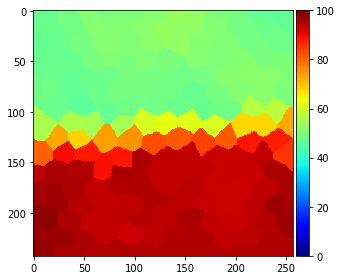

In [4]:
local_mean_measurements = cle.mean_of_touching_neighbors(measurements, touch_matrix)

parametric_image = cle.replace_intensities(tissue, local_mean_measurements)
imshow(cle.pull_zyx(parametric_image), vmin=0, vmax=100, cmap='jet')

# Edge preserving filters: median
By averaging using a median filter, we can also reduce noise while keeping the edge between the regions sharp

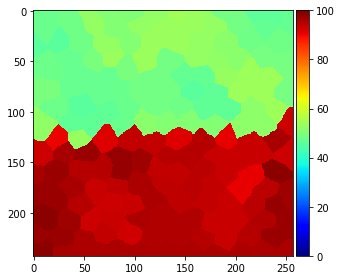

In [5]:
local_median_measurements = cle.median_of_touching_neighbors(measurements, touch_matrix)

parametric_image = cle.replace_intensities(tissue, local_median_measurements)
imshow(cle.pull_zyx(parametric_image), vmin=0, vmax=100, cmap='jet')

# Increasing filter radius: neighbors of neighbors
In order to increase the radius of the operation, we need to determin neighbors of touching neighbors

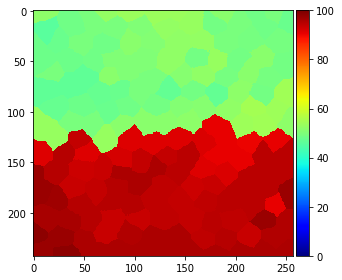

In [6]:
neighbor_matrix = cle.neighbors_of_neighbors(touch_matrix)

local_median_measurements = cle.median_of_touching_neighbors(measurements, neighbor_matrix)

parametric_image = cle.replace_intensities(tissue, local_median_measurements)
imshow(cle.pull_zyx(parametric_image), vmin=0, vmax=100, cmap='jet')